In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import numpy as np
%matplotlib inline
# import the required modules

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# load the data

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.25)
x_train, x_test, x_val = x_train.reshape(60000, 28, 28, 1) / 255, x_test.reshape(7500, 28, 28, 1) / 255, x_val.reshape(2500, 28, 28, 1) / 255
y_train, y_test, y_val = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test), keras.utils.to_categorical(y_val)
# convert labels to binary matrix and reshape images to 4D array for convolution layers

In [ ]:
model = keras.Sequential([
                    
                    keras.layers.InputLayer(input_shape=(28, 28, 1)),

                    keras.layers.Conv2D(128, (3,3), padding='same'),
                    keras.layers.MaxPool2D((2,2), padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Conv2D(128, (3,3), padding='same'),
                    keras.layers.MaxPool2D((2,2), padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Conv2D(64, (3,3), padding='valid', kernel_initializer='he_uniform'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Flatten(),

                    keras.layers.Dense(128),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Dense(10),
                    keras.layers.Activation('softmax')

])

In [ ]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class special_callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_loss') < 0.015: 
      self.model.stop_training = True
      print("Stopping model training...")
stopper = special_callback()
# a callback to stop training if the validation accuarcy reaches over 99.5%

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), callbacks=[stopper])

Epoch 1/30
938/938 [==============================] - 9s 9ms/step - loss: 0.3461 - accuracy: 0.8957 - val_loss: 0.0587 - val_accuracy: 0.9820
Epoch 2/30
938/938 [==============================] - 8s 9ms/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.0423 - val_accuracy: 0.9876
Epoch 3/30
938/938 [==============================] - 8s 8ms/step - loss: 0.0914 - accuracy: 0.9721 - val_loss: 0.0323 - val_accuracy: 0.9904
Epoch 4/30
938/938 [==============================] - 8s 8ms/step - loss: 0.0771 - accuracy: 0.9775 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 5/30
938/938 [==============================] - 8s 8ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.0286 - val_accuracy: 0.9916
Epoch 6/30
938/938 [==============================] - 8s 8ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 7/30
938/938 [==============================] - 8s 8ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0208 - val_accuracy: 0.9924
Epoch 

In [34]:
# callback wasn't executed, but we have still managed to achieve a good accuracy

model.evaluate(x_test, y_test)
# evaluate the model with test data

235/235 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.9959


[0.010688514448702335, 0.9958666563034058]

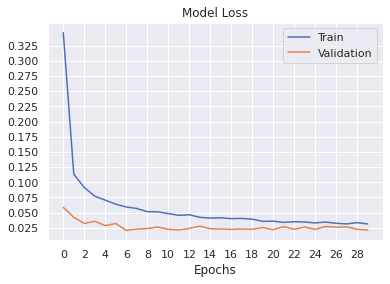

In [ ]:
sns.set()
plt.yticks(np.arange(0, 0.35, 0.025))
plt.xticks(np.arange(0, 30, 2))
plt.xlabel("Epochs")
plt.title("Model Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')

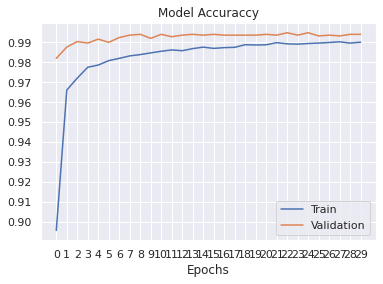

In [ ]:
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0.9, 1, 0.01))
plt.xlabel("Epochs")
plt.title("Model Accuraccy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='lower right')

In [ ]:
model.save("MNIST_1.h5")